# Back Propagation Training and Keras

In this module, you will learn about the maths behind the popular Back Propagation algorithm used to optimize neural networks. In the Back Propagation notebook, you will also see and understand the use of activation functions. The main purpose of most activation function is to introduce non-linearity in the network so it would be capable of learning more complex patterns. Last, but not least, you will learn to use functions and APIs from the Keras library to solve tasks that involve neural networks, and these tasks start with loading images.

Learning Objectives
- Understand the working mechanics of Back Propagation
- Implement different methods of loading images using Keras




# Back Propagation, Activation Function

## How to Train a Neural Network

How to Train a Neural Net?

- Put in Training inputs, get the output.
- Compare output to correct answers: Look at loss function J.
- Adjust and repeat.
- Backpropagation tells us how to make a single adjustment using calculus.

How Have We Trained Before?

Gradient Descent:
- 1. Make prediction
- 2. Calculate Loss
- 3. Calculate gradient of the loss function w.r.t. parameters
- 4. Update parameters by taking a step in the opposite direction
- 5. Iterate

How to Train a Neural Net?

How could we change the weights to make our Loss Function lower?
1. Think of neural net as a function F: X  Y.
2. F is a complex computation involving many weights Wk.
3. Given the structure, the weights "define" the function F (and therefore define our model).
4. Loss Function is J(y, F(x)).

![](./images/12_TrainNeuralNetwork.png)

How to Train a Neural Net?
Get $\dfrac{\partial J}{\partial W_k}$ for every weight in the network.
This tells us what direction to adjust each $W_k$ if we want to lower our loss function.
Make an adjustment and repeat!




## Backpropagation

![](./images/13_BackPropagation.png)

![](./images/14_Backpropagation.png)

###  Vanishing Gradients

The mathematical equation is:

$$
\frac{\partial J}{\partial W} = (\hat{y} - y) \cdot W^{(3)} \cdot \sigma'(z^{(3)}) \cdot W^{(2)} \cdot \sigma'(z^{(2)}) \cdot X
$$

Points to remember:

- Remember $\sigma'(z) = \sigma(z)(1 - \sigma(z)) \leq .25$.
- As we have more layers, the gradient gets very small at the early layers.
- This is known as the "vanishing gradient" problem.
- For this reason, other activations (such as ReLU) have become more common.



## The Sigmoid Activation Function

![](./images/15_ActivationFunction.png)



## Other Popular Activation Functions

### Hyperbolic Tangent Function

The hyperbolic tangent function, pronounced "tanch", is defined as:

$$
\tanh(z) = \frac{\sinh(z)}{\cosh(z)} = \frac{e^{2x} - 1}{e^{2x} + 1}
$$

It has the following special cases:

- $\tanh(0) = 0$
- $\tanh(\infty) = 1$
- $\tanh(-\infty) = -1$

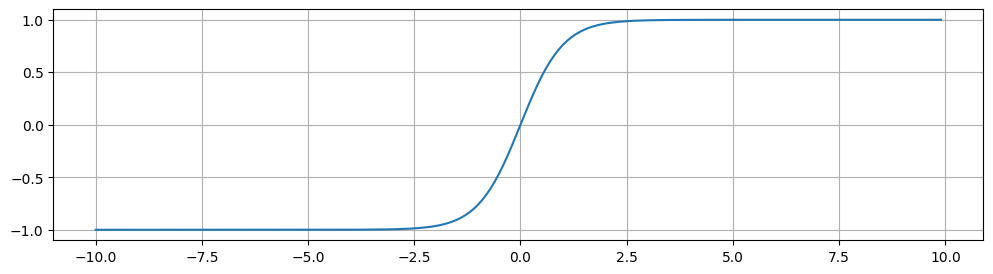

In [19]:
# Hyperbotic Tangent Function

#Setup
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-10,10,0.1)

tanh = np.tanh(z)

# plt.subplot(1,1,1, figsize=(16,9))
plt.figure(figsize=(12,3))
plt.plot(z, tanh)
plt.grid(True)


### Rectified Linear Unit (ReLU)

The Rectified Linear Unit function, or ReLU, is defined as:

$$
ReLU(z) = 
\begin{cases} 
0 & \text{if } z < 0 \\
z & \text{if } z \geq 0 
\end{cases}
$$

It has the following special cases:

- $ReLU(0) = 0$
- $ReLU(z) = z$ for $z > 0$
- $ReLU(-z) = 0$

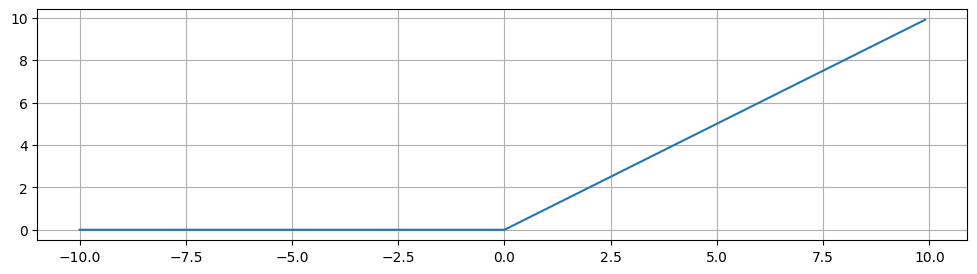

In [21]:
def relu(z):
    if z>0:
        return z
    return 0

z = np.arange(-10,10,0.1)

y = [relu(i) for i in z ]

# plt.subplot(1,1,1, figsize=(16,9))
plt.figure(figsize=(12,3))
plt.plot(z, y)
plt.grid(True)

### "Leaky" Rectified Linear Unit (LReLU)

The "Leaky" Rectified Linear Unit function, or LReLU, is defined as:

$$
LReLU(z) = 
\begin{cases} 
az & \text{if } z < 0 \\
z & \text{if } z \geq 0 
\end{cases}
$$

where $a$ is a constant less than 1.

It has the following special cases:

- $LReLU(0) = 0$
- $LReLU(z) = z$ for $z > 0$
- $LReLU(-z) = -az$

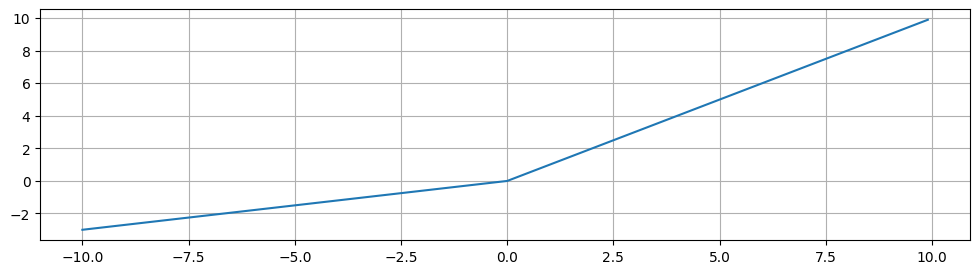

In [23]:
def lrelu(z, alpha):
    if z>=0:
        return z
    return alpha*z

z = np.arange(-10,10,0.1)

y = [lrelu(i, 0.3) for i in z ]

# plt.subplot(1,1,1, figsize=(16,9))
plt.figure(figsize=(12,3))
plt.plot(z, y)
plt.grid(True)

### Activation Function Summary

The right activation function depends on the application, and there are no hard and fast rules.

| Method             | Use case                                                                          |
|--------------------|-----------------------------------------------------------------------------------|
| Sigmoid Activation | Useful when outcomes should be in (0, 1), suffers from vanishing gradient issues  |
| Hyperbolic Tangent | Useful when outcomes should be in (-1, 1), suffers from vanishing gradient issues |
| ReLU               | Useful to capture large effects, doesn't suffer from vanishing gradient           |
| Leaky ReLU         | Acts like ReLU, but allows negative outcomes                                      |

# Keras Library

Learning Goals
- Overview of Python libraries for Deep Learning
- Setting up a network structure
- Building models using Keras

## Popular Deep Learning Library

Some of the most common libraries include:
1. TensorFlow
2. Theano
3. PyTorch

Keras is a high-level library, can run on either TensorFlow or Theano

In this course we will focus on running Keras, which will run TensorFlow 'under the hood'

## A Typical Keras Workflow

Build the structure of your network.
1. Compile the model, specifying your loss function, metrics, and optimizer
(this includes the learning rate).
2. Fit the model on your training data (specifying batch size, number of epochs).
3. Predict on new data.
4. Evaluate your results.

Keras provides two approaches to building the structure of your model:
- **Sequential Model**: allows a linear stack of layers -
simpler and more convenient if model has this form.
- **Functional API**: more detailed and complex, but allows more complicated architectures.

## Implementing an Example Neural Network in Keras



# Sequential Model

In [25]:
# Import libraries, model elements
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential ()

# For the first layer, specify the input dimension
model.add(Dense(units=4, input_dim=3))

# Specify activation function
model.add (Activation('sigmoid'))

# For subsequent layers, the input dimension is presumed from the previous layer
model.add(Dense(units=4))
model.add(Activation ('sigmoid'))

ModuleNotFoundError: No module named 'tensorflow'